# Objetivo

Avaliar se há clusters no portfólio 2. Em um segundo momento, a partir de uma clusterização global (na base toda), buscar novos clientes na base completa.

# Método

A partir do conjunto reduzido de features (47), aplicar um processo de clusterização (AgglomerativeClustering).

# Leitura dos arquivos

In [3]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import feather

## Leitura da lista de features a excluir

In [2]:
# obtida em EDA Pandas_profiling_sample_10k_market.ipynb
exclude_df = pd.read_csv('../exclude_variables_generated_from_profiling.csv')
exclude_variables = exclude_df.values.squeeze().tolist()
len(exclude_variables)

133

## Carregamento Portfólio 1

In [18]:
p2 = pd.read_csv('../clientes2_merge.csv')
p2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Columns: 182 entries, Unnamed: 0 to qt_filiais
dtypes: bool(16), float64(144), int64(2), object(20)
memory usage: 743.0+ KB


## Redução no número de features

In [19]:
p2.drop(columns=exclude_variables, inplace= True)

NameError: name 'exclude_variables' is not defined

In [20]:
p2.shape

(566, 182)

# Clusterização

## Teste com dados dummy

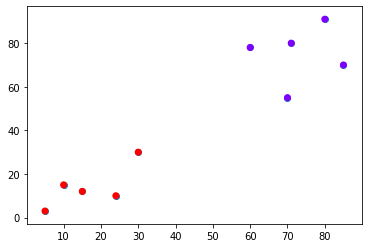

In [4]:
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])
plt.scatter(X[:,0],X[:,1])

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(X)

plt.scatter(X[:,0],X[:,1], c=cluster.labels_, cmap='rainbow')

In [11]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[5,3], [10,15], [15,12], [24,10], [30,30], [85,70], [71,80], [60,78], [70,55], [80,91],])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
core_samples_mask = np.zeros_like(clustering.labels_, dtype=bool)
core_samples_mask[clustering.core_sample_indices_] = True
labels=clustering.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)



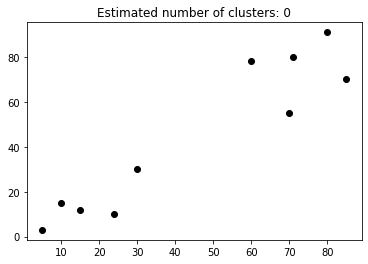

In [12]:
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()


## Dados do portfólio

Para usar nos dados do portfólio, temos que passar as strings para valor numérico.

In [21]:
# portfolio 2, reduzido (micro): p1micro
p2micro = p2.drop(columns=['Unnamed: 0', 'id'])

In [22]:
p2micro.dtypes == object

fl_matriz                                        False
de_natureza_juridica                              True
sg_uf                                             True
natureza_juridica_macro                           True
de_ramo                                           True
setor                                             True
idade_empresa_anos                               False
idade_emp_cat                                     True
fl_me                                            False
fl_sa                                            False
fl_epp                                           False
fl_mei                                           False
fl_ltda                                          False
dt_situacao                                       True
fl_st_especial                                   False
fl_email                                         False
fl_telefone                                      False
fl_rm                                             True
nm_divisao

In [23]:
p2micro.head(3)

fl_matriz                       de_natureza_juridica sg_uf  \
0       True  AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL    AC   
1       True                                  MUNICIPIO    RN   
2       True                 SOCIEDADE SIMPLES LIMITADA    PI   

  natureza_juridica_macro                                            de_ramo  \
0   ADMINISTRACAO PUBLICA  ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL   
1                  OUTROS  ADMINISTRACAO PUBLICA, DEFESA E SEGURIDADE SOCIAL   
2  ENTIDADES EMPRESARIAIS                               SERVICOS DE EDUCACAO   

     setor  idade_empresa_anos idade_emp_cat  fl_me  fl_sa  ...  \
0  SERVIÇO           11.243836       10 a 15  False  False  ...   
1  SERVIÇO           43.789041          > 20  False  False  ...   
2  SERVIÇO           16.389041       15 a 20  False  False  ...   

   media_meses_servicos  max_meses_servicos  min_meses_servicos  \
0             99.961009          357.066667           25.533333   
1            149.173091          526.133333           23.200000   
2             65.942017          149.033333            4.866667   

  qt_funcionarios  qt_funcionarios_12meses  qt_funcionarios_24meses  \
0          1361.0                   1361.0                   1383.0   
1           991.0                    991.0                   1306.0   
2           119.0                    104.0                    113.0   

   tx_crescimento_12meses tx_crescimento_24meses tx_rotatividade qt_filiais  
0                0.000000              -1.590745            0.00          0  
1                0.000000             -24.119449            0.00          0  
2               14.423077               5.309735            6.25          0  

[3 rows x 180 columns]

In [24]:
# Vou começar com 4 features: de_natureza_juridica, sg_uf, de_ramo, de_nivel_atividade
categorical_cols = ['de_natureza_juridica', 'sg_uf', 'de_ramo', 'de_nivel_atividade']
for feat in categorical_cols:
    print(p2micro[feat].value_counts())
    print('\n')

SOCIEDADE EMPRESARIA LIMITADA                                             287
MUNICIPIO                                                                 110
EMPRESA INDIVIDUAL DE RESPONSABILIDADE LIMITADA DE NATUREZA EMPRESARIA     31
SOCIEDADE ANONIMA FECHADA                                                  21
ASSOCIACAO PRIVADA                                                         21
ORGAO PUBLICO DO PODER EXECUTIVO ESTADUAL OU DO DISTRITO FEDERAL           19
ORGAO PUBLICO DO PODER EXECUTIVO MUNICIPAL                                 12
EMPRESARIO INDIVIDUAL                                                      10
FUNDO PUBLICO                                                               6
AUTARQUIA ESTADUAL OU DO DISTRITO FEDERAL                                   6
SERVICO SOCIAL AUTONOMO                                                     6
SOCIEDADE SIMPLES LIMITADA                                                  6
COOPERATIVA                                                     

In [25]:
# Usando LabelEncoder
#https://chrisalbon.com/machine_learning/preprocessing_structured_data/convert_pandas_categorical_column_into_integers_for_scikit-learn/
from sklearn import preprocessing
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()

In [39]:
# apply le on categorical feature columns
# https://towardsdatascience.com/encoding-categorical-features-21a2651a065c

#portfolio 1 com labelencoder: p1enc
p2enc=pd.DataFrame()
categorical_cols = ['de_natureza_juridica', 'sg_uf', 'de_ramo']
# %*%*%*%%*%*%*%%*%*%*%%*%*%*%%*%*%*%%*%*%*%
# IMPORTANTE aqui, só três features, para poder visualizar em um gráfico 3D.
# Também porque de_nivel_atividade tem alguns NaN, que tem que ser resolvidos depois
# %*%*%*%%*%*%*%%*%*%*%%*%*%*%%*%*%*%%*%*%*%
p2enc[categorical_cols] = p2micro[categorical_cols].apply(lambda col: le.fit_transform(col))

p2enc[categorical_cols].head(5)

de_natureza_juridica  sg_uf  de_ramo
0                     1      0        0
1                    12      4        0
2                    25      3       19
3                    12      1        0
4                    24      4       14

In [40]:
p2enc.shape

(566, 3)

In [54]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
clustering = DBSCAN().fit(p2enc)
labels = clustering.labels_
p2enc['cluster'] = labels

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)



Estimated number of clusters: 32
Estimated number of noise points: 263


In [56]:
# aqui, estou somando um valor aleatório para fins de visualização.
# Se não for feito, um grupo grande de pontos fica condensado em um único ponto no gráfico
# e perde-se a noção de cluster
p2enc['de_natureza_juridica']=p2enc['de_natureza_juridica'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc['de_ramo']=p2enc['de_ramo'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc['sg_uf']=p2enc['sg_uf'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc.head(5)

import plotly.express as px
fig = px.scatter_3d(p2enc, x='de_natureza_juridica', y='sg_uf', z='de_ramo', color = 'cluster')
fig.show()

In [39]:
# aqui, estou somando um valor aleatório para fins de visualização.
# Se não for feito, um grupo grande de pontos fica condensado em um único ponto no gráfico
# e perde-se a noção de cluster
p2enc['de_natureza_juridica']=p2enc['de_natureza_juridica'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc['de_ramo']=p2enc['de_ramo'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc['sg_uf']=p2enc['sg_uf'] + ((np.random.rand(p2enc.shape[0])-0.5) *0.5)
p2enc.head(5)

de_natureza_juridica     sg_uf    de_ramo  cluster
0              0.852603 -0.143055  -0.244926        0
1             12.147162  4.096763   0.111031        0
2             24.794295  2.947905  19.031795        3
3             11.847822  0.988321   0.215425        0
4             24.055814  4.230985  14.123266        3

In [40]:
import plotly.express as px
fig = px.scatter_3d(p2enc, x='de_natureza_juridica', y='sg_uf', z='de_ramo', color = 'cluster')
fig.show()

## Conclusão até o momento

Clusterização parece interessante. Observar que, das três categorias avaliadas, o `de_ramo` não teve muita influência, porque está bem polarizado em uma das classes. Próximos passos: incluir mais features (sabendo que vai impedir a visualização em mais de 3 dimensões) e aplicar redução de dimensionalidade (PCA? antes ou depois da clusterização?).